In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
from scipy.io import wavfile

In [1]:
! pip install pydub

  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='pypi.org', port=443): Read timed out. (read timeout=15)",)': /simple/pydub/
  Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'ReadTimeoutError("HTTPSConnectionPool(host='pypi.org', port=443): Read timed out. (read timeout=15)",)': /simple/pydub/
You are using pip version 18.0, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Extracting Audio Chunks

In [78]:
from pydub import AudioSegment
from pydub.utils import db_to_float
from pydub.silence import split_on_silence
import wave

In [85]:
# Template Audio
file_handle = input()
template_raw_audio = AudioSegment.from_wav(file_handle)

Data/hello1.wav


In [ ]:
# Ringtone + Voice Raw Audio
file_handle = input()
mixed_raw_audio = AudioSegment.from_wav(file_handle)

In [82]:
# Splitting the audio based on silence
# These thresholds should be adaptive
threshold = -30
min_length = 200
templates = split_on_silence(template_raw_audio, min_silence_len=min_length, silence_thresh=threshold)

/anaconda/envs/p1/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  
/anaconda/envs/p1/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


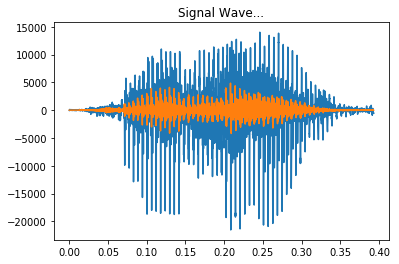

In [83]:
#Extract Raw Audio from Wav File
signal = np.fromstring(templates[0].raw_data, 'Int16')

#Split the data into channels 
channels = [[] for channel in range(wav_file.getnchannels())]
for index, datum in enumerate(signal):
    channels[index%len(channels)].append(datum)

#Get time from indices
fs = wav_file.getframerate()
Time = np.linspace(0, len(signal)/len(channels)/fs, num=len(signal)/len(channels))

#Plot
plt.figure(1)
plt.title('Signal Wave...')
for channel in channels:
    plt.plot(Time,channel)
plt.show()

# Template Matching

In [93]:
def cosineSimilarity(template_signal, audio_signal):
    sim = np.dot(template_signal, audio_signal)/(np.linalg.norm(template_signal) * np.linalg.norm(audio_signal))
    return sim

In [94]:
print(cosineSimilarity(signal, signal))

4.37986431426e-08
